# Práctica 3

In [46]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Ejercicio 1: Regresión logística multi-clase

In [47]:
data = loadmat('ex3data1.mat')

y = data['y']
X = data['X']

(-0.5, 199.5, 19.5, -0.5)

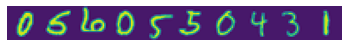

In [48]:
sample = np.random.choice(X.shape[0],10)
plt.imshow(X[sample, :].reshape(-1,20).T)
plt.axis('off')

In [49]:
y = np.ravel(y)
print(y)
m=len(y)
X_1 = np.hstack([np.ones([m, 1]), X])

[10 10 10 ...  9  9  9]


In [50]:
def sigmoide(z):
    return (1.0/(1.0+np.exp(-z)))

In [51]:
def coste(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Term1 = np.matmul(y, np.log(H))
    Term2 = np.matmul((1 - y), np.log(1 - H))
    cost = (- 1 / (len(y))) * np.sum(Term1 + Term2)
    return cost

In [52]:
def gradiente(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Dif = H - y
    grad = (1 / len(y)) * np.matmul(Dif, X)
    return grad

In [53]:
def coste_reg(Theta, X, y, Lambda):
    Term1 = coste(Theta, X, y)
    Term2 = (Lambda/(2*len(y))) * np.sum(Theta**2)
    cost = Term1 + Term2
    return cost 

In [54]:
def gradiente_reg(Theta, X, y, Lambda):
    grad = gradiente(Theta, X, y) + ((Lambda/len(y))*np.r_[[0],Theta[1:]])
    return grad

In [68]:
def yOneHot(y, num_etiquetas):
    y = (y-1)
    y_onehot = np.zeros((m, num_etiquetas)) #Matriz 5000 x 10
    for i in range(m):
        y_onehot[i][y[i]] = 1
    return y_onehot

In [69]:
def oneVsAll(X, y, num_etiquetas, reg):
    y_onehot = yOneHot(y,num_etiquetas)
    all_theta =np.zeros((num_etiquetas, X.shape[1]))
    theta = np.zeros(X.shape[1])
    for c in range(num_etiquetas):
        result = opt.fmin_tnc(func=coste_reg, x0=theta, fprime=gradiente_reg, args=(X,y_onehot[:, c], reg))
        all_theta[c]=result[0]
    return all_theta

In [73]:
Theta = oneVsAll(X_1,y,10,0.1)
print(Theta.shape)

(10, 401)


In [67]:
def prediccion(theta, X):
    y_prediccion = sigmoide(np.matmul(theta, np.transpose(X)))
    

(10, 401)


obtener la predicción de cada clase para cada ejemplo de entrenamiento (sigmoide(np.matmul(theta, np.transpose(X)) de cada clase) obteniendo una matriz de 5000 x 10, 5000 casos de entrenamiento y para cada caso un array de 10 valores de 0 a 1 (resultado de aplicar la función sigmoide)
tomar el mayor valor de cada predicción  de cada caso de entrenamiento, entonces el caso de entrenamiento se asigna a la clase de la posición del mayor valor.
al final tenemos que obtener un vector 5000 de predicciones con valores del 0 al 9 y compararlo con el vector y-1 dado. 